In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, RFE, SelectFromModel

## Features Selection

<p>Chi-Square<p/>
Chi-square can be used when the dependent and the independent variable, both are categorical. A typical example of it is when dealing with classification problems where the dependent variable has categories. If the independent variables are also categorical then a chi-square test can be run and the features that don’t share the relation with the output variables (Y Variable/ Dependent variable) can be dropped. However, if there are a lot of strategical variables having numerous categories, it is better to encode the categorical variables and use more sophisticated feature reduction methods which require the features to be numerical. Also running chi-square for multiple categorical variables can be time-consuming and other faster, more sophisticated methods may be deployed for the reduction of dimensionality.

Understanding Chi-Square with an example
In this blog, one of the most useful non-parametric test is explored- The Chi-Square test.

Chi-square test uses two categorical variables (or nominally scaled variables) and is a non-parametric test because it makes no assumptions about the distribution of the sample while doing the Goodness of Fit test. Goodness of Fit test is used to check whether a given distribution fits the sample well or not (in other words if the sample data represents the data you would expect to find in the actual population or not) and is used in statistics such as the Chi-Square, Shipiro-Wilk, Kolmogorov-Smirnov etc.

In [2]:
df = pd.DataFrame({ 'size': ['small', 'medium', 'large', 'extra_large'], 
                   'color': ['red', 'green','blue','orange'],
                   'price': [10,13,18,23]})

df_cat = df['size'].astype('category')
df_cat = pd.get_dummies(df_cat) 
df.drop('size', axis=1, inplace=True)
df = pd.concat([df, df_cat], axis=1)

df_cat = df['color'].astype('category')
df_cat = pd.get_dummies(df_cat) 
df.drop('color', axis=1, inplace=True)
df = pd.concat([df, df_cat], axis=1)
df.head()

,price,extra_large,large,medium,small,blue,green,orange,red
0,10,0,0,0,1,0,0,0,1
1,13,0,0,1,0,0,1,0,0
2,18,0,1,0,0,1,0,0,0
3,23,1,0,0,0,0,0,1,0


## CHI SQUARE

In [3]:
y = df.iloc[:,df.columns.get_loc('price')]

In [4]:
x =df.iloc[:,:-1]

In [5]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(x,y)
features = fit.transform(x)

In [6]:
print(fit.scores_)

[6.125 3.    3.    3.    3.    3.    3.    3.   ]


In [7]:
features

array([[10,  1,  0,  0,  0],
       [13,  0,  0,  1,  0],
       [18,  0,  1,  0,  0],
       [23,  0,  0,  0,  1]])

In [8]:
fit.get_support()

array([ True, False, False, False,  True,  True,  True,  True])

In [9]:
[(feature_name) for bool_val,feature_name in zip(fit.get_support(), x.columns)  ]

['price', 'extra_large', 'large', 'medium', 'small', 'blue', 'green', 'orange']

In [10]:
new_features_idx = fit.get_support(indices=True)

In [11]:
x.iloc[:,new_features_idx].head()

,price,small,blue,green,orange
0,10,1,0,0,0
1,13,0,0,1,0
2,18,0,1,0,0
3,23,0,0,0,1


## f_classif

In [12]:
wine = datasets.load_wine()

In [16]:
wine_df = pd.DataFrame(np.column_stack((wine.data, wine.target)), columns=wine.feature_names+['target'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [36]:
x = wine_df.iloc[:,:-1]
y = wine_df.iloc[:,wine_df.columns.get_loc('target')]

fclass = SelectKBest(score_func=f_classif, k='all')

result = fclass.fit_transform(x,y)

alcohol                        135.07762424283948
malic_acid                     36.94342496318376
ash                            13.312901199989989
alcalinity_of_ash              35.77163740730817
magnesium                      12.429584338150178
total_phenols                  93.73300962036775
flavanoids                     233.92587268154838
nonflavanoid_phenols           27.575417146965727
proanthocyanins                30.27138317022791
color_intensity                120.66401844100372
hue                            101.31679539029965
od280/od315_of_diluted_wines   189.97232057888206
proline                        207.92037390217828


<BarContainer object of 13 artists>

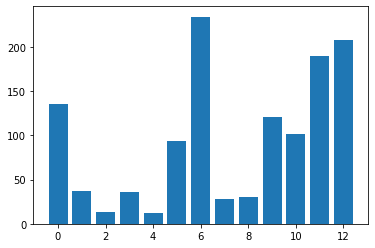

In [39]:
for idx in range(len(fclass.scores_)):
    print(f"{wine_df.iloc[:,idx].name:30} {fclass.scores_[idx]}")

plt.bar(list(range(len(fclass.scores_))), fclass.scores_)    

In [21]:
selector_fclass.get_support(indices=True)

array([ 0,  6,  9, 11, 12])